[0.    0.002]
[0.002 0.001]


/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_13565/1390802161.py:34: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  solution = linprog(-c, A_ub=A, b_ub=b, method='revised simplex')


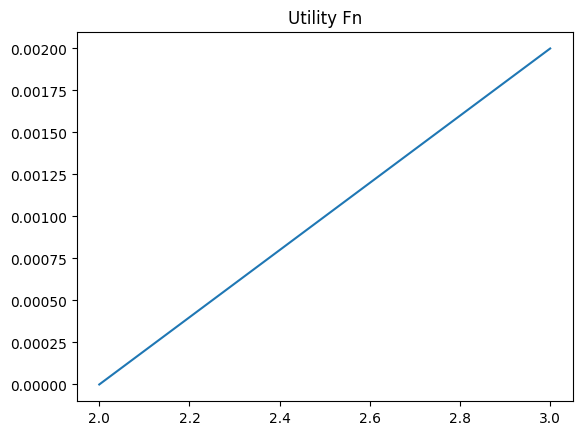

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Data - (p1,q1),(q1,q2)
# Afriat Inequalities - u1, u2, l1, l2
# u1-u1 - l1*p1(q1-q1) < 0
# u1-u2 - l2*p2(q1-q2) < 0
# u2-u1 - l1*p1(q2-q1) < 0
# u2-u2 - l2*p2(q2-q2) < 0
# -l1 < 0
# -l2 < 0

# linear program
# max_{x} c'x s.t. Ax<b

p1 = 1
p2 = 2
q1 = 2
q2 = 3
# init parameters
c = np.array([0,0,0,0])
A = np.array([[0, 0, 0, 0],
              [1, -1, 0, -p2*(q1-q2)], 
              [-1, 1, -p1*(q2-q1), 0], 
              [0, 0, 0, 0], 
              [0, 0, -1, 0], 
              [0, 0, 0, -1],
             ])
b = np.array([0,0,0,0,-0.001,-0.001])

# Solve the problem
# we put a negative sign on the objective as linprog does minimization
solution = linprog(-c, A_ub=A, b_ub=b, method='revised simplex')
U = solution.x[0:2]
L = solution.x[2:]
print(U)
print(L)
plt.plot([q1,q2],U)
plt.title('Utility Fn')
plt.show()

In [76]:
p = np.array([1,2])
q = np.array([2,3])
N = len(q)
c = np.zeros(2*N)
b = np.zeros(N*N+N)
b[N*N:] = -0.0001
b[-N:] = -0.001
A = np.zeros((N*N+N, N+N))
for cnt in range(N):
    i = 0
    for j in range(N):        
        if i == cnt:
            pass
        else:
            A[cnt*N+i,cnt] = 1
            A[cnt*N+i,j] = -1
            A[cnt*N+i,N+j] = -p[j]*(q[cnt] - q[j])
        A[N*N+i,N+i]=-1
        i += 1
solution = linprog(-c, A_ub=A, b_ub=b, method='revised simplex')
solution.x

/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_13565/1646226132.py:20: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  solution = linprog(-c, A_ub=A, b_ub=b, method='revised simplex')


array([0.   , 0.002, 0.002, 0.001])

[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.    -0.001 -0.001 -0.001 -0.001]
[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.  -1.   0.   0.   0.  -2.   0.   0.]
 [  1.   0.  -1.   0.   0.   0.  -6.   0.]
 [  1.   0.   0.  -1.   0.   0.   0. -12.]
 [ -1.   1.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.  -1.   0.   0.   0.  -3.   0.]
 [  0.   1.   0.  -1.   0.   0.   0.  -8.]
 [ -1.   0.   1.   0.   2.   0.   0.   0.]
 [  0.  -1.   1.   0.   0.   2.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.  -1.   0.   0.   0.  -4.]
 [ -1.   0.   0.   1.   3.   0.   0.   0.]
 [  0.  -1.   0.   1.   0.   4.   0.   0.]
 [  0.   0.  -1.   1.   0.   0.   3.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  -1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  -1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  -1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  -1.]]

/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_13565/2311449745.py:23: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  solution = linprog(-c, A_ub=A, b_ub=b, method='revised simplex')


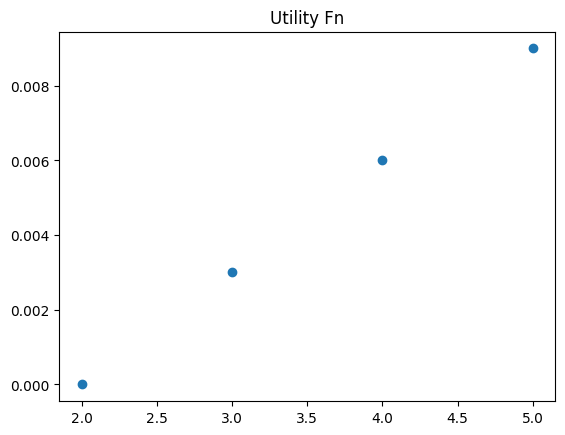

In [80]:
p = np.array([1,2,3,4])
q = np.array([5,4,3,2])
N = len(q)
c = np.zeros(2*N)
b = np.zeros(N*N+N)
b[-N:] = -0.001
A = np.zeros((N*N+N, N+N))
for cnt in range(N):
    i = 0
    for j in range(N):        
        if i == cnt:
            pass
        else:
            A[cnt*N+i,cnt] = 1
            A[cnt*N+i,j] = -1
            A[cnt*N+i,N+j] = -p[j]*(q[cnt] - q[j])
        A[N*N+i,N+i]=-1
        i += 1
print(b)
print(A)
# Solve the problem
# we put a negative sign on the objective as linprog does minimization
solution = linprog(-c, A_ub=A, b_ub=b, method='revised simplex')
U = solution.x[0:N]
L = solution.x[N:]
print(U)
print(L)
plt.scatter(q,U)
plt.title('Utility Fn')
plt.show()

[0.    0.009]
[0.001 0.001]


/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_13565/1870372986.py:21: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  solution = linprog(-c, A_ub=A, b_ub=b, method='revised simplex')


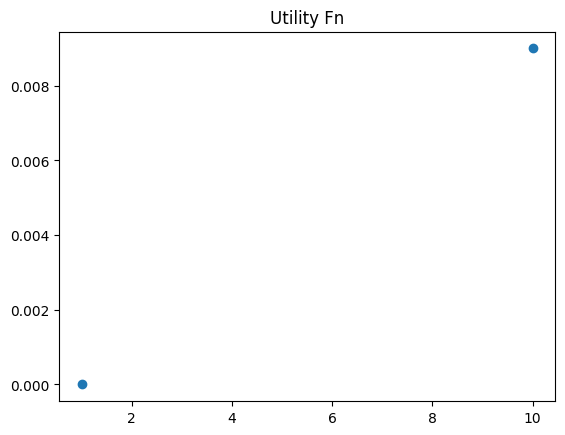

In [78]:
p = np.array([10,1])
q = np.array([1,10])
N = len(q)
c = np.zeros(2*N)
b = np.zeros(N*N+N)
b[-N:] = -0.001
A = np.zeros((N*N+N, N+N))
for cnt in range(N):
    i = 0
    for j in range(N):        
        if i == cnt:
            pass
        else:
            A[cnt*N+i,cnt] = 1
            A[cnt*N+i,j] = -1
            A[cnt*N+i,N+j] = -p[j]*(q[cnt] - q[j])
        A[N*N+i,N+i]=-1
        i += 1
# Solve the problem
# we put a negative sign on the objective as linprog does minimization
solution = linprog(-c, A_ub=A, b_ub=b, method='revised simplex')
U = solution.x[0:N]
L = solution.x[N:]
print(U)
print(L)
plt.scatter(q, U)
plt.title('Utility Fn')
plt.show()